In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Datasets

In [6]:
# Load datasets
file_path_1 = '/Users/nicholasnoto/Desktop/CIS 4170/4170 Team#1 Project/NBA_Player_Stats.csv'
file_path_2 = '/Users/nicholasnoto/Desktop/CIS 4170/4170 Team#1 Project/NBA_Player_Stats_2.csv'
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Display basic info of datasets
print("Dataset 1 Info:")
print(df1.info())
print("\nDataset 1 Preview:")
print(df1.head())

print("\nDataset 2 Info:")
print(df2.info())
print("\nDataset 2 Preview:")
print(df2.head())

Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14573 entries, 0 to 14572
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      14573 non-null  int64  
 1   Player  14573 non-null  object 
 2   Pos     14573 non-null  object 
 3   Age     14573 non-null  int64  
 4   Tm      14573 non-null  object 
 5   G       14573 non-null  int64  
 6   GS      14573 non-null  int64  
 7   MP      14573 non-null  float64
 8   FG      14573 non-null  float64
 9   FGA     14573 non-null  float64
 10  FG%     14485 non-null  float64
 11  3P      14573 non-null  float64
 12  3PA     14573 non-null  float64
 13  3P%     12375 non-null  float64
 14  2P      14573 non-null  float64
 15  2PA     14573 non-null  float64
 16  2P%     14419 non-null  float64
 17  eFG%    14485 non-null  float64
 18  FT      14573 non-null  float64
 19  FTA     14573 non-null  float64
 20  FT%     13824 non-null  float64
 21  ORB     14573 non-n

## Merge Datasets

In [9]:
# Standardizing column names for merging
df1.rename(columns={'Year': 'Season'}, inplace=True)

# Merge datasets on common columns
merged_df = pd.merge(df1, df2, on=['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', 
                                    '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 
                                    'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Season'],
                     how='outer')

# Display merged dataset info
print("\nMerged Dataset Info:")
print(merged_df.info())

# Display preview of merged data
print("\nMerged Dataset Preview:")
print(merged_df.head())


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29146 entries, 0 to 29145
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      29146 non-null  int64  
 1   Player  29146 non-null  object 
 2   Pos     29146 non-null  object 
 3   Age     29146 non-null  int64  
 4   Tm      29146 non-null  object 
 5   G       29146 non-null  int64  
 6   GS      29146 non-null  int64  
 7   MP      29146 non-null  float64
 8   FG      29146 non-null  float64
 9   FGA     29146 non-null  float64
 10  FG%     28970 non-null  float64
 11  3P      29146 non-null  float64
 12  3PA     29146 non-null  float64
 13  3P%     24750 non-null  float64
 14  2P      29146 non-null  float64
 15  2PA     29146 non-null  float64
 16  2P%     28838 non-null  float64
 17  eFG%    28970 non-null  float64
 18  FT      29146 non-null  float64
 19  FTA     29146 non-null  float64
 20  FT%     27648 non-null  float64
 21  ORB     29146

## Filter Data for Steph Curry

In [12]:
# Filter for Stephen Curry's data
curry_df = merged_df[merged_df["Player"] == "Stephen Curry"]

# Display Curry's stats
print("\nStephen Curry Stats Preview:")
print(curry_df.head())


Stephen Curry Stats Preview:
       Rk         Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  DRB  \
6499  100  Stephen Curry  PG   21  GSW  80  77  36.2  6.6  14.3  ...  3.9   
7101  102  Stephen Curry  PG   22  GSW  74  74  33.6  6.8  14.2  ...  3.2   
7673  102  Stephen Curry  PG   23  GSW  26  23  28.2  5.6  11.4  ...  2.8   
8225   97  Stephen Curry  PG   24  GSW  78  78  38.2  8.0  17.8  ...  3.3   
8819  111  Stephen Curry  PG   25  GSW  78  78  36.5  8.4  17.7  ...  3.7   

      TRB  AST  STL  BLK  TOV   PF   PTS     Season  MVP  
6499  4.5  5.9  1.9  0.2  3.0  3.2  17.5  2009-2010  NaN  
7101  3.9  5.8  1.5  0.3  3.1  3.1  18.6  2010-2011  NaN  
7673  3.4  5.3  1.5  0.3  2.5  2.4  14.7  2011-2012  NaN  
8225  4.0  6.9  1.6  0.2  3.1  2.5  22.9  2012-2013  NaN  
8819  4.3  8.5  1.6  0.2  3.8  2.5  24.0  2013-2014  NaN  

[5 rows x 32 columns]


## Analyze Three-Point Performance

In [15]:
# Ensure 3P% is correctly calculated
curry_df["3P%"] = (curry_df["3P"] / curry_df["3PA"]) * 100

# Display results
print("\nCurry Three-Point Performance:")
print(curry_df[["Season", "3P", "3PA", "3P%"]].head())


Curry Three-Point Performance:
         Season   3P  3PA        3P%
6499  2009-2010  2.1  4.8  43.750000
7101  2010-2011  2.0  4.6  43.478261
7673  2011-2012  2.1  4.7  44.680851
8225  2012-2013  3.5  7.7  45.454545
8819  2013-2014  3.3  7.9  41.772152


/var/folders/4h/z0_vz5_s3kg8kx5jd85f4rhh0000gn/T/ipykernel_10286/1311095021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curry_df["3P%"] = (curry_df["3P"] / curry_df["3PA"]) * 100


## Visualize Three-Point Attempts & Makes Over Time

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

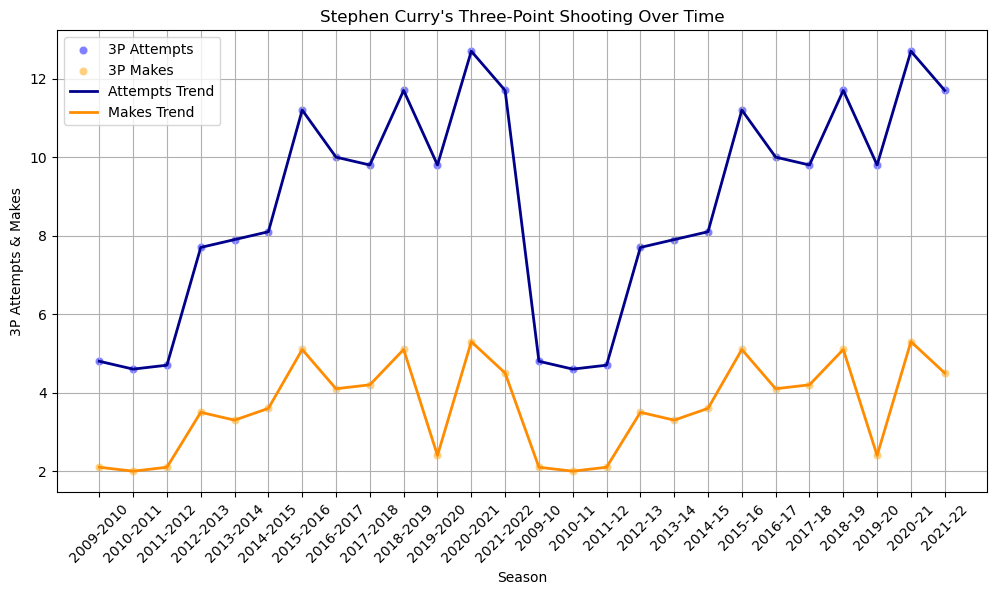

In [20]:
plt.figure(figsize=(12, 6))

# Scatter plot for attempts and makes
sns.scatterplot(data=curry_df, x="Season", y="3PA", color="blue", alpha=0.5, label="3P Attempts")
sns.scatterplot(data=curry_df, x="Season", y="3P", color="orange", alpha=0.5, label="3P Makes")

# Trend line
sns.lineplot(data=curry_df, x="Season", y="3PA", color="darkblue", linewidth=2, label="Attempts Trend")
sns.lineplot(data=curry_df, x="Season", y="3P", color="darkorange", linewidth=2, label="Makes Trend")

# Formatting
plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("3P Attempts & Makes")
plt.title("Stephen Curry's Three-Point Shooting Over Time")
plt.legend()
plt.grid()
plt.show()


## Calculate Career Three-Point Percentage

In [23]:
career_3p_percentage = (curry_df["3P"].sum() / curry_df["3PA"].sum()) * 100
print(f"\nStephen Curry's Career 3P%: {career_3p_percentage:.2f}%")


Stephen Curry's Career 3P%: 41.24%


## Compare Curry’s 3P% with Other Players

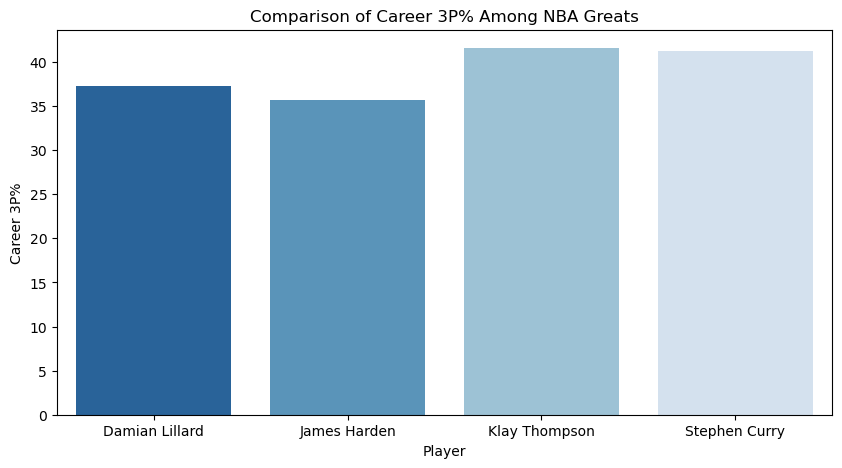

In [26]:
# Select key players for comparison
players = ["Stephen Curry", "Klay Thompson", "Ray Allen", "Reggie Miller", "James Harden", "Damian Lillard"]
filtered_df = merged_df[merged_df["Player"].isin(players)]

# Group by player and calculate 3P%
player_3p = filtered_df.groupby("Player").agg(
    total_attempts=("3PA", "sum"),
    total_makes=("3P", "sum")
).reset_index()

# Calculate 3P%
player_3p["3P%"] = (player_3p["total_makes"] / player_3p["total_attempts"]) * 100

# Plot comparison
plt.figure(figsize=(10, 5))
sns.barplot(data=player_3p, x="Player", y="3P%", palette="Blues_r")
plt.xlabel("Player")
plt.ylabel("Career 3P%")
plt.title("Comparison of Career 3P% Among NBA Greats")
plt.show()

## Regression Analysis for Predicting Curry’s Future 3P%

/var/folders/4h/z0_vz5_s3kg8kx5jd85f4rhh0000gn/T/ipykernel_10286/1822096157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curry_df["Season"] = curry_df["Season"].astype(str).str[:4].astype(int)  # Convert to integer year
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tr

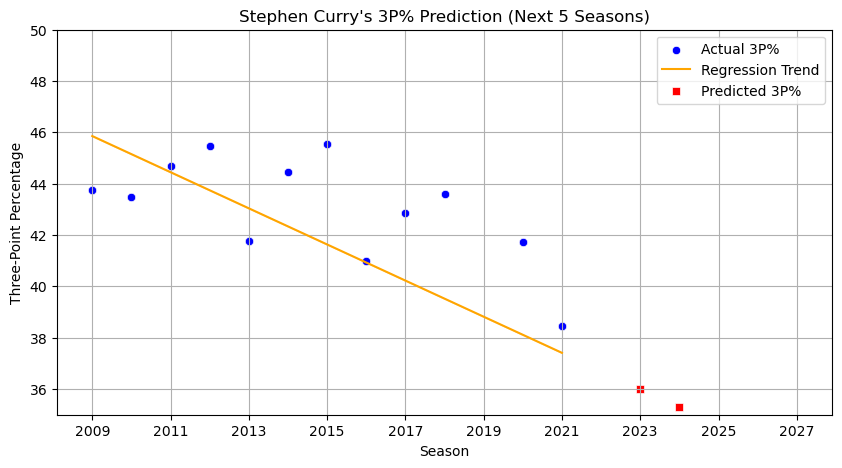

   Season  Predicted 3P%
0    2023      36.003850
1    2024      35.300038
2    2025      34.596226
3    2026      33.892414
4    2027      33.188603


In [29]:
from sklearn.linear_model import LinearRegression

# Prepare Curry's data for regression
curry_df["Season"] = curry_df["Season"].astype(str).str[:4].astype(int)  # Convert to integer year
curry_df = curry_df.sort_values(by="Season")

# Define features (X) and target variable (y)
X = curry_df["Season"].values.reshape(-1, 1)  # Independent variable: Season (year)
y = curry_df["3P%"].values  # Dependent variable: 3P%

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future 3P% for next 5 seasons
future_seasons = np.array([2023, 2024, 2025, 2026, 2027]).reshape(-1, 1)
future_predictions = model.predict(future_seasons)

# Create a dataframe for predicted values
future_df = pd.DataFrame({"Season": future_seasons.flatten(), "Predicted 3P%": future_predictions})

# Plot actual and predicted 3P%
plt.figure(figsize=(10, 5))
sns.scatterplot(x=curry_df["Season"], y=curry_df["3P%"], label="Actual 3P%", color="blue")
sns.lineplot(x=curry_df["Season"], y=model.predict(X), label="Regression Trend", color="orange")
sns.scatterplot(x=future_df["Season"], y=future_df["Predicted 3P%"], label="Predicted 3P%", color="red", marker="s")

plt.xlabel("Season")
plt.ylabel("Three-Point Percentage")
plt.title("Stephen Curry's 3P% Prediction (Next 5 Seasons)")
plt.xticks(range(2009, 2028, 2))
plt.ylim(35, 50)
plt.legend()
plt.grid()

plt.show()

# Display predicted values
print(future_df)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


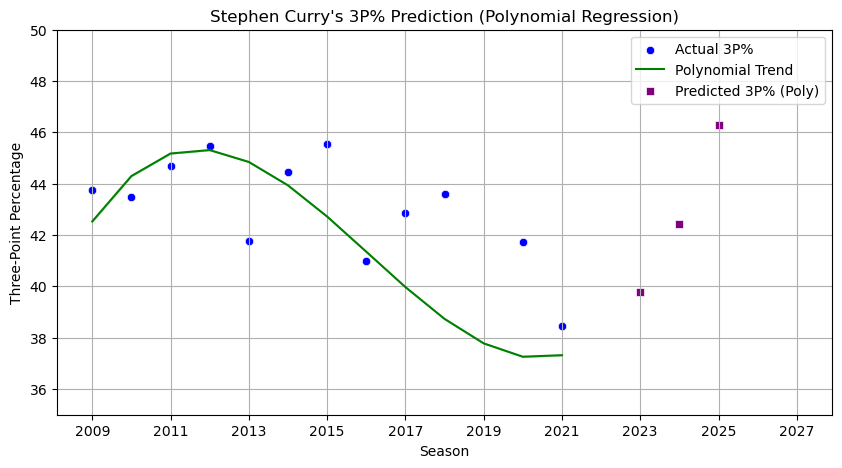

   Season  Predicted 3P%  Predicted 3P% (Poly)
0    2023      36.003850             39.767157
1    2024      35.300038             42.449577
2    2025      34.596226             46.300514
3    2026      33.892414             51.467073
4    2027      33.188603             58.096354


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial regression model (degree 3)
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Train model
poly_model.fit(X, y)

# Predict future seasons
future_poly_predictions = poly_model.predict(future_seasons)

# Add results to dataframe
future_df["Predicted 3P% (Poly)"] = future_poly_predictions

# Plot updated predictions
plt.figure(figsize=(10, 5))
sns.scatterplot(x=curry_df["Season"], y=curry_df["3P%"], label="Actual 3P%", color="blue")
sns.lineplot(x=curry_df["Season"], y=poly_model.predict(X), label="Polynomial Trend", color="green")
sns.scatterplot(x=future_df["Season"], y=future_df["Predicted 3P% (Poly)"], label="Predicted 3P% (Poly)", color="purple", marker="s")

plt.xlabel("Season")
plt.ylabel("Three-Point Percentage")
plt.title("Stephen Curry's 3P% Prediction (Polynomial Regression)")
plt.xticks(range(2009, 2028, 2))
plt.ylim(35, 50)
plt.legend()
plt.grid()
plt.show()

print(future_df)